<a href="https://colab.research.google.com/github/dmahali1983/Computer-Vision/blob/main/Image_Classification_Animal10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> Image Classificaiton - Animals 10 Dataset using ResNet18 </b></font></p>

---
Steps:

1. Finding or creating, then exploring a data set
        a. Pre-processing
        b. Fix Any Issues w/ the data
        c. Check dataset for noise
2. Choose the proper model
        a. Some constraints
        b. How to pick a model including where to find models
3. Train the model
        a. Data Augmentation
4. Test the model

In [1]:
! pip install -q kaggle

In [2]:
# upload your kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dbalan83","key":"723ff09b9d5a3d8fc9aaf0c7a642e755"}'}

In [3]:
import os
os.listdir("./")


['.config', 'kaggle.json', 'sample_data']

In [4]:
!rm -rf /root/.kaggle


In [5]:
!mkdir ~/.kaggle



In [6]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2796        239  1.0              
bhavikjikadara/car-price-prediction-dataset            Car Price Prediction Dataset                  4KB  2023-12-23 07:07:54            985         29  0.9411765        
thedevastator/global-video-game-sales-and-reviews      Global Video Game Sales and Reviews          56KB  2023-12-20 06:36:51            917         24  1.0              
vassyesboy/netflix-engagement-jan-jun-23               Netflix Engagement (Jan - Jun 23) +           2MB  2023-12-15 11:58:07           1088     

In [7]:
# dowload the dataset
!kaggle datasets download -d alessiocorrado99/animals10
# unzip the dataset
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [8]:
import os
import pandas as pd

def process_paths_to_df(ds_pth): # construct path to images

    # Find all class folders
    # Then append each image path into it's respective class
    foldernames = os.listdir(ds_path)
    categories = []
    categories_num = []
    files = []
    i = 0
    for k, folder in enumerate(foldernames):
        filenames = os.listdir(ds_path + "/" + folder);
        for file in filenames:
            files.append(ds_path + "/" + folder + "/" + file)
            categories.append(folder.split("/")[-1])
            categories_num.append(k)

    # Create a pandas DF for nice visualization
    df = pd.DataFrame({
        'filename': files,
        'category': categories,
        'category_num': categories_num
    })

    return df

ds_path = 'raw-img'
train_df = process_paths_to_df(ds_path)
train_df.head()
train_df = train_df.reset_index(drop=True)
train_df

,filename,category,category_num
0,raw-img/pecora/OIP-ilh15TiQNjr00jzKVaMmRAHaFj....,pecora,0
1,raw-img/pecora/OIP-ezEUObJGS81SCBR-HJN-swHaE9....,pecora,0
2,raw-img/pecora/OIP-YTgN9FGZDyAejXY8YlZ7swHaE8....,pecora,0
3,raw-img/pecora/OIP-lCJyoUeMjlppMCi5s50BUwHaIY....,pecora,0
4,raw-img/pecora/OIP-7T0-pvAAnGgSZ04sGpPf5AAAAA....,pecora,0
...,...,...,...
26174,raw-img/cavallo/OIP-ZEQhE-Gttrv1_4xUPAgMEQHaKZ...,cavallo,9
26175,raw-img/cavallo/OIP-3XKB0dWhFpLIsq5g12CAKQHaFj...,cavallo,9
26176,raw-img/cavallo/OIP-fILMSp_hYCcvrY0ieLRzigHaF9...,cavallo,9
26177,raw-img/cavallo/OIP-o3wPtM7U6DkaNbdt3KXjbQHaJi...,cavallo,9


In [9]:
# This dictionary has both Spanish(?):English and English:Spanish(?)
translate = {"cane": "dog",
             "cavallo": "horse",
             "elefante": "elephant",
             "farfalla": "butterfly",
             "gallina": "chicken",
             "gatto": "cat",
             "mucca": "cow",
             "pecora": "sheep",
             "ragno": "spider",
             "scoiattolo": "squirrel",
             "dog": "cane",
             "cavallo": "horse",
             "elephant" : "elefante",
             "butterfly": "farfalla",
             "chicken": "gallina",
             "cat": "gatto",
             "cow": "mucca",
             "spider": "ragno",
             "squirrel": "scoiattolo"}

# Spanish(?):English
translate_to_eng = {"cane": "dog",
             "cavallo": "horse",
             "elefante": "elephant",
             "farfalla": "butterfly",
             "gallina": "chicken",
             "gatto": "cat",
             "mucca": "cow",
             "pecora": "sheep",
             "ragno": "spider",
             "scoiattolo": "squirrel"}

In [10]:
train_df['category'] = train_df['category'].map(translate_to_eng)
train_df

,filename,category,category_num
0,raw-img/pecora/OIP-ilh15TiQNjr00jzKVaMmRAHaFj....,sheep,0
1,raw-img/pecora/OIP-ezEUObJGS81SCBR-HJN-swHaE9....,sheep,0
2,raw-img/pecora/OIP-YTgN9FGZDyAejXY8YlZ7swHaE8....,sheep,0
3,raw-img/pecora/OIP-lCJyoUeMjlppMCi5s50BUwHaIY....,sheep,0
4,raw-img/pecora/OIP-7T0-pvAAnGgSZ04sGpPf5AAAAA....,sheep,0
...,...,...,...
26174,raw-img/cavallo/OIP-ZEQhE-Gttrv1_4xUPAgMEQHaKZ...,horse,9
26175,raw-img/cavallo/OIP-3XKB0dWhFpLIsq5g12CAKQHaFj...,horse,9
26176,raw-img/cavallo/OIP-fILMSp_hYCcvrY0ieLRzigHaF9...,horse,9
26177,raw-img/cavallo/OIP-o3wPtM7U6DkaNbdt3KXjbQHaJi...,horse,9


<Axes: xlabel='category'>

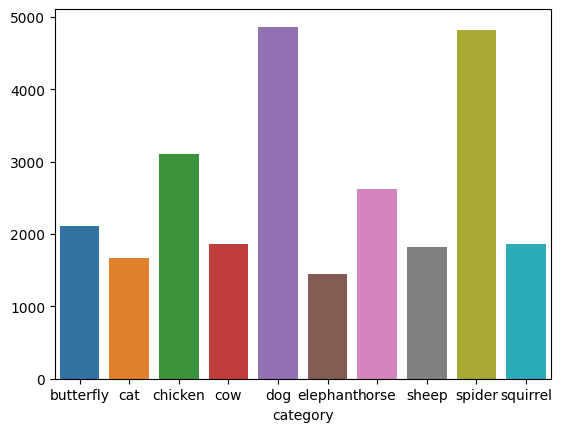

In [11]:
import seaborn as sns
grouped = train_df.groupby('category').size()
sns.barplot(x = grouped.index, y = grouped)

In [12]:
import torch
import numpy as np

# We need to define the weights for each class
# to be inversely proportional to the number of samples for each class
# this will automatically sample all classes equally

samples_weight = np.array(1.0 / grouped)
samples_weight = torch.from_numpy(samples_weight)
sampler = torch.utils.data.WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))

In [13]:
# We will undersample the majority class
n_classes = 10
n_per_class = 100

under_samped_df = pd.DataFrame(columns=['filename', 'category'])
for i in train_df['category'].unique():
    under_samped_df = pd.concat([under_samped_df, train_df[train_df.category == i].iloc[:n_per_class,:]])

print(under_samped_df)

                                                filename category  \
0      raw-img/pecora/OIP-ilh15TiQNjr00jzKVaMmRAHaFj....    sheep   
1      raw-img/pecora/OIP-ezEUObJGS81SCBR-HJN-swHaE9....    sheep   
2      raw-img/pecora/OIP-YTgN9FGZDyAejXY8YlZ7swHaE8....    sheep   
3      raw-img/pecora/OIP-lCJyoUeMjlppMCi5s50BUwHaIY....    sheep   
4      raw-img/pecora/OIP-7T0-pvAAnGgSZ04sGpPf5AAAAA....    sheep   
...                                                  ...      ...   
23651  raw-img/cavallo/OIP-IJc-tspAUyF6SdeqoigzjwHaE_...    horse   
23652  raw-img/cavallo/OIP-f56LbzCASZae2qjcr_G4QgHaGj...    horse   
23653  raw-img/cavallo/OIP-xVj9aNYOrDi8OG_Vs0xhhwHaFK...    horse   
23654  raw-img/cavallo/OIP-jrCzvUV-YqJ45PWItGEzegHaLL...    horse   
23655  raw-img/cavallo/OIP-oNCm5v4YI3pcIyGjJurmFAHaEz...    horse   

       category_num  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
23651           9

<Axes: xlabel='category'>

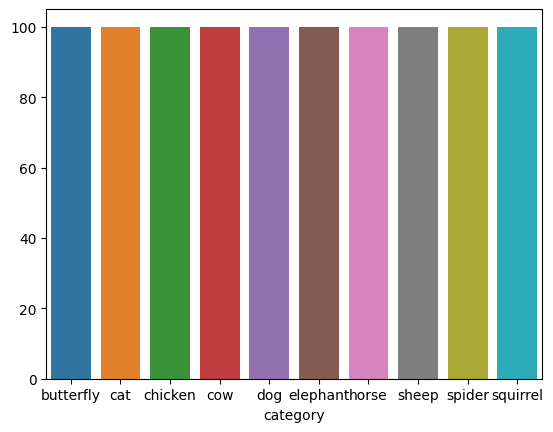

In [14]:
# Now we can examine the distribution of the balanced dataset
newGrouped = under_samped_df.groupby('category').size()
sns.barplot(x = newGrouped.index, y = newGrouped)

In [15]:
import random

# Pretrained models for CNNs come from torchvision
import torchvision.models as models

seed = 1234
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

# Next we can define a custom ResNet CNN model to extract features from
# We just want to remove the final classification layer
# For easy reference look up the source code from PyTorch:
# https://pytorch.org/vision/main/_modules/torchvision/models/resnet.html#resnet
# Look at the layers in the ResNet model, and remove the output layer

class ResNet18(models.ResNet):
    def __init__(self, num_classes=1000, pretrained=True, **kwargs):
        # Start with the standard resnet18
        super().__init__(
            block=models.resnet.BasicBlock,
            layers=[2, 2, 2, 2],
            num_classes=num_classes,
            **kwargs
        )
        if pretrained:
            state_dict = torch.hub.load_state_dict_from_url(
                'https://s3.amazonaws.com/pytorch/models/resnet18-5c106cde.pth',
                # models.resnet.model_urls['resnet18'],
                progress=True
            )
            self.load_state_dict(state_dict)

    # Reimplement the forward pass to remove the classification layer
    def _forward_impl(self, x):
        # Standard forward for resnet
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # Notice there is no forward pass through the original classifier.
        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        return x

In [16]:
# Now we need a Dataset and DataLoader from PyTorch
# For this exercise, we will create a custom Dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import skimage



In [17]:
from torchvision import transforms  # Prepare transformation for images
animal_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

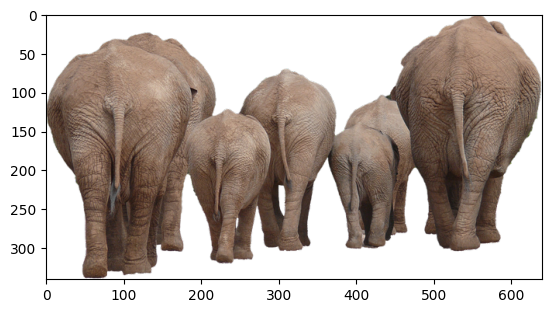

In [18]:
import matplotlib.pyplot as plt
img_w_alpha = skimage.io.imread("./raw-img/elefante/e835b50620f0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.png")
plt.imshow(img_w_alpha)
plt.show()

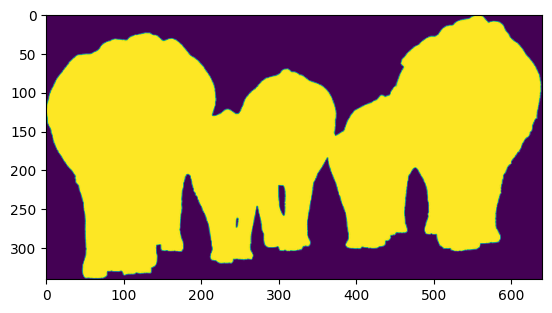

In [19]:
# My guess is the alpha channel is the last channel
plt.imshow(img_w_alpha[:, :, 3])
plt.show()

In [20]:
# Run through again to check for errors >>> You should find one more error >> checking that you should find a grayscale image

class AnimalsTenDataset(Dataset):
    def __init__(self, dataset_df, transform=None, target_transform=None):
        self.img_labels = dataset_df['category_num']
        self.img_labels_eng = dataset_df['category']
        self.img_paths = dataset_df['filename']
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths.iloc[idx]
        # Index out alpha channel
        image = skimage.io.imread(img_path)
        image = image[:, :, :3]
        label = self.img_labels.iloc[idx]
        label_eng = self.img_labels_eng.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        output = {"image": image, "label": label, "label_eng": label_eng, "img_path": img_path}
        return output

dataloader = DataLoader(AnimalsTenDataset(under_samped_df, transform=animal_transforms),
                        batch_size=16, shuffle=False)

labels = []
image_paths = []
for i, batch in enumerate(dataloader):
    images = batch['image']
    labels += batch['label']
    image_paths += batch['img_path']



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [21]:
# One more error this time the code is expecting a 3D image but it is getting a 2D array (which i think is a gray scale image)
class AnimalsTenDataset(Dataset):
    def __init__(self, dataset_df, transform=None, target_transform=None):
        self.img_labels = dataset_df['category_num']
        self.img_labels_eng = dataset_df['category']
        self.img_paths = dataset_df['filename']
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        try:
            img_path = self.img_paths.iloc[idx]
            # Index out alpha channel
            image = skimage.io.imread(img_path)
            image = image[:, :, :3]
        except:
            print(img_path)

        label = self.img_labels.iloc[idx]
        label_eng = self.img_labels_eng.iloc[idx]
        if self.transform:
            if image.shape[-1] == 4:
                print(img_path)
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        output = {"image": image, "label": label, "label_eng": label_eng, "img_path": img_path}
        return output

dataloader = DataLoader(AnimalsTenDataset(under_samped_df, transform=animal_transforms),
                        batch_size=16, shuffle=False)

labels = []
image_paths = []
for i, batch in enumerate(dataloader):
    images = batch['image']
    labels += batch['label']
    image_paths += batch['img_path']


In [22]:
class AnimalsTenDataset(Dataset):
    def __init__(self, dataset_df, transform=None, target_transform=None):
        self.img_labels = dataset_df['category_num']
        self.img_labels_eng = dataset_df['category']
        self.img_paths = dataset_df['filename']
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths.iloc[idx]
        image = skimage.io.imread(img_path)
        # Convert Grayscale images to RGB
        if(len(image.shape)< 3):
            image = skimage.color.gray2rgb(image)
        # Index out alpha channel
        image = image[:, :, :3]
        label = self.img_labels.iloc[idx]
        label_eng = self.img_labels_eng.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        output = {"image": image, "label": label, "label_eng": label_eng, "img_path": img_path}
        return output

dataloader = DataLoader(AnimalsTenDataset(under_samped_df, transform=animal_transforms),
                        batch_size=16, shuffle=False)

labels = []
image_paths = []
for i, batch in enumerate(dataloader):
    images = batch['image']
    labels += batch['label']
    image_paths += batch['img_path']

In [23]:
# Ready to extract features for t-sne viz

def get_features(dataset, batch, c_transform, model):
    # Move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        model.cuda()

    # Read the dataset and initialize the data loader
    dataset = AnimalsTenDataset(dataset, transform=c_transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch,
                                             shuffle=False)

    # We'll store the features as NumPy array of size num_images x feature_size
    features = None

    # We'll also store the image labels and paths to visualize them later
    labels = []
    labels_eng = []
    img_paths = []

    for i, batch in enumerate(dataloader):
        if (i % 10) == 0:
            print("Extracting Features [{}/{}]".format(i, len(dataloader)))
        if torch.cuda.is_available():
            images = batch['image'].cuda()
        else:
            images = batch['image']
        labels += batch['label']
        labels_eng += batch['label_eng']
        img_paths += batch['img_path']

        with torch.no_grad():
            output = model.forward(images)

        current_features = output.cpu().numpy()
        if features is not None:
            features = np.concatenate((features, current_features))
        else:
            features = current_features
    return features, labels, labels_eng, img_paths

batch_size = 16

model = ResNet18(pretrained=True)
model.eval()

features, labels, labels_eng, img_paths = get_features(under_samped_df, batch_size, animal_transforms, model)

Downloading: "https://s3.amazonaws.com/pytorch/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 9.44MB/s]


Extracting Features [0/63]
Extracting Features [10/63]
Extracting Features [20/63]
Extracting Features [30/63]
Extracting Features [40/63]
Extracting Features [50/63]
Extracting Features [60/63]


In [24]:
print(features.shape)
print(len(labels_eng))

(1000, 512)
1000


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = pca.fit_transform(features)
print(features.shape)


(1000, 2)


In [26]:
# Ready for TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2).fit_transform(features)

In [27]:
colors_per_class = {
    'dog' : [254, 202, 87],
    'horse' : [255, 107, 107],
    'elephant' : [10, 189, 227],
    'butterfly' : [255, 159, 243],
    'chicken' : [16, 172, 132],
    'cat' : [128, 80, 128],
    'cow' : [87, 101, 116],
    'sheep' : [52, 31, 151],
    'spider' : [0, 0, 0],
    'squirrel' : [100, 100, 255],
}

# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

def visualize_tsne_points(tx, ty, labels):
    # initialize matplotlib plot
    fig = plt.figure(figsize=(12.24, 12.24))
    ax = fig.add_subplot(111)

    # for every class, we'll add a scatter plot separately
    for label in colors_per_class:
        # find the samples of the current class in the data
        indices = [i for i, l in enumerate(labels) if l == label]

        # extract the coordinates of the points of this class only
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)

        # convert the class color to matplotlib format:
        # BGR -> RGB, divide by 255, convert to np.array
        color = np.array([colors_per_class[label][::-1]], dtype=float) / 255

        # add a scatter plot with the correponding color and label
        ax.scatter(current_tx, current_ty, c=color, label=label)

    # build a legend using the labels we set previously
    ax.legend(loc='best')

    # finally, show the plot
    plt.show()

def visualize_tsne(tsne, images, labels, plot_size=1000, max_image_size=100):
    # extract x and y coordinates representing the positions of the images on T-SNE plot
    tx = tsne[:, 0]
    ty = tsne[:, 1]

    # scale and move the coordinates so they fit [0; 1] range
    tx = scale_to_01_range(tx)
    ty = scale_to_01_range(ty)

    # visualize the plot: samples as colored points
    visualize_tsne_points(tx, ty, labels)

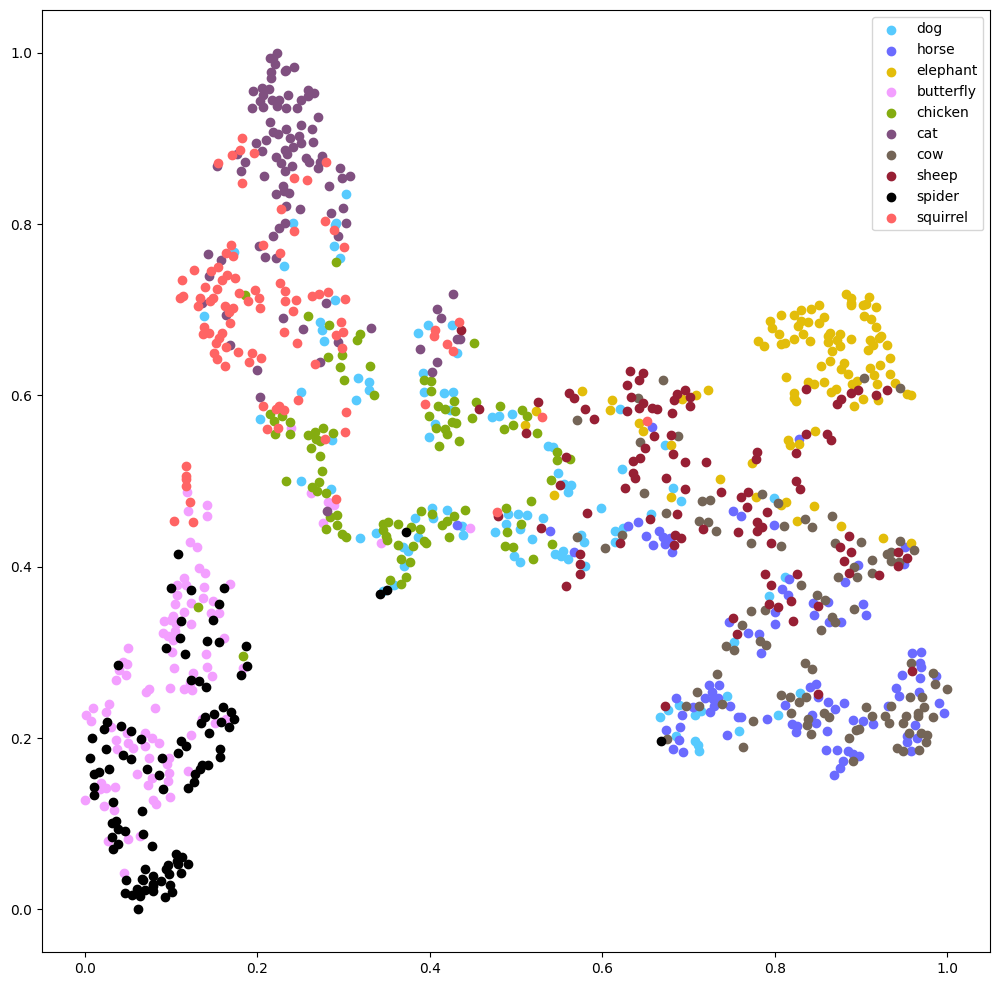

In [28]:
visualize_tsne(tsne, img_paths, labels_eng)

In [29]:
from sklearn import cluster

num_clusters = 10 # Same as number of classes

# Center is the mean
# Use pandas to group by class, then aggregate over the rows
feature_df = pd.DataFrame.from_records([features, labels_eng, img_paths]).transpose()
feature_df.columns = ["Features", "Class", "Filenames"]
print(feature_df.head())
cluster_centers = feature_df.groupby("Class")["Features"].apply(lambda x: np.array(x.tolist()).mean(axis=0))
print(cluster_centers)


                  Features  Class  \
0  [0.7395542, -2.3680172]  sheep   
1  [2.6796987, -0.9513225]  sheep   
2    [2.9717617, 0.738972]  sheep   
3   [1.7711774, 2.7166364]  sheep   
4     [4.979968, 0.465962]  sheep   

                                           Filenames  
0  raw-img/pecora/OIP-ilh15TiQNjr00jzKVaMmRAHaFj....  
1  raw-img/pecora/OIP-ezEUObJGS81SCBR-HJN-swHaE9....  
2  raw-img/pecora/OIP-YTgN9FGZDyAejXY8YlZ7swHaE8....  
3  raw-img/pecora/OIP-lCJyoUeMjlppMCi5s50BUwHaIY....  
4  raw-img/pecora/OIP-7T0-pvAAnGgSZ04sGpPf5AAAAA....  
Class
butterfly     [-6.4011865, -3.8322446]
cat              [-4.85847, 7.2921996]
chicken         [-1.976859, 0.8490367]
cow             [6.219712, -2.6615005]
dog          [-0.030917604, 0.5370861]
elephant         [8.543066, 3.0861053]
horse           [5.3643603, -3.218528]
sheep            [4.791707, 0.5168334]
spider         [-6.6737213, -6.289931]
squirrel        [-4.9776945, 3.720948]
Name: Features, dtype: object


In [30]:
# Now ready to fit the clusters
k_means = cluster.KMeans(n_clusters=10, init=np.vstack(cluster_centers.values)).fit(np.vstack(feature_df['Features'].array))
print(k_means.labels_)

[4 4 4 4 7 6 3 4 7 7 7 4 7 4 4 7 6 7 4 6 5 4 7 3 4 7 4 7 7 7 6 5 7 4 7 7 6
 7 7 4 7 7 5 5 4 7 7 4 3 7 7 5 3 4 6 6 7 6 7 7 4 7 4 7 7 3 4 3 7 7 3 6 7 7
 5 3 7 4 3 3 4 7 7 7 7 4 5 7 7 4 4 7 7 3 4 7 7 7 3 7 1 1 9 1 1 1 1 1 1 1 1
 1 1 9 1 9 1 1 1 1 1 1 1 1 9 1 1 1 1 2 1 9 9 1 1 2 1 9 1 1 1 9 1 9 9 1 1 1
 9 9 1 1 1 1 9 1 9 9 9 1 9 2 1 1 1 1 9 1 2 1 1 1 1 4 1 1 1 1 9 1 4 1 1 1 1
 1 1 9 1 1 9 1 1 1 1 1 9 1 9 9 2 2 2 2 2 2 2 4 2 2 4 4 9 2 2 2 4 9 2 4 2 2
 2 2 0 4 2 4 4 4 4 2 2 2 2 2 9 2 2 2 9 2 2 2 9 9 4 2 2 9 2 2 4 2 2 2 9 2 2
 2 2 9 2 4 2 2 2 2 2 4 9 2 9 2 4 2 4 2 2 2 2 2 2 0 2 2 4 2 2 9 2 2 2 2 4 4
 4 2 4 2 8 8 0 0 0 8 0 8 8 8 0 0 8 8 0 0 8 2 8 0 6 8 8 0 8 8 8 8 8 0 8 8 8
 8 8 8 8 8 8 8 8 0 8 8 8 0 0 8 8 8 8 0 8 8 0 8 0 0 0 8 0 8 0 8 0 8 8 8 0 8
 8 0 0 8 0 0 0 0 8 8 0 8 0 0 0 8 8 2 8 0 0 8 8 2 0 8 8 8 8 8 7 7 3 3 6 3 5
 6 7 7 3 7 6 6 4 3 6 7 6 6 6 7 3 3 3 3 3 6 4 5 6 7 3 3 6 3 3 3 7 6 3 3 6 3
 3 6 3 6 3 3 3 3 6 7 3 3 6 3 3 3 3 3 3 6 6 3 3 6 6 3 7 7 7 6 7 3 3 3 3 3 7
 3 3 3 6 7 6 6 3 6 6 4 3 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
# We need to determine which class is which
feature_df['Cluster_Num'] = k_means.labels_
feature_df["Cluster_Num"].mask(feature_df["Class"]=="horse",6,inplace=True)
cross_table = feature_df.groupby(["Class", "Cluster_Num"]).count().sort_values("Features", ascending=False).groupby("Class")

cluster_per_class_df = cross_table.head(1).reset_index()

cluster_number_per_class = dict(zip(cluster_per_class_df.Class, cluster_per_class_df.Cluster_Num))

# Check to make sure no repeat clusters
seen_clusters = set()
for k, v in cluster_number_per_class.items():
    if v not in seen_clusters:
        seen_clusters.add(v)
    else:
        print("Shared Class! {}:{}".format(k, v))


class_to_cluster = {v:k for k, v in cluster_number_per_class.items()}
print(cluster_number_per_class)


{'horse': 6, 'squirrel': 9, 'cat': 1, 'butterfly': 0, 'elephant': 5, 'chicken': 2, 'spider': 8, 'sheep': 7, 'cow': 3, 'dog': 4}


In [32]:
# Ready to find incorrect examples

def check_correct(c_class, c_label):

    if cluster_number_per_class[c_class] == c_label:
        return True
    else:
        return False

def predicted_class_in_eng(c_label):

    return class_to_cluster[c_label]

feature_df['Correct'] = feature_df.apply(lambda x: check_correct(x.Class, x.Cluster_Num), axis=1)
feature_df['Predicted_Class'] = feature_df.apply(lambda x: predicted_class_in_eng(x.Cluster_Num), axis=1)
incorrect_preds = feature_df[feature_df['Correct'] == False]
incorrect_preds

,Features,Class,Filenames,Cluster_Num,Correct,Predicted_Class
0,"[0.7395542, -2.3680172]",sheep,raw-img/pecora/OIP-ilh15TiQNjr00jzKVaMmRAHaFj....,4,False,dog
1,"[2.6796987, -0.9513225]",sheep,raw-img/pecora/OIP-ezEUObJGS81SCBR-HJN-swHaE9....,4,False,dog
2,"[2.9717617, 0.738972]",sheep,raw-img/pecora/OIP-YTgN9FGZDyAejXY8YlZ7swHaE8....,4,False,dog
3,"[1.7711774, 2.7166364]",sheep,raw-img/pecora/OIP-lCJyoUeMjlppMCi5s50BUwHaIY....,4,False,dog
5,"[4.5264835, -2.05368]",sheep,raw-img/pecora/OIP-hKSsmk-1cWhTUqW_rUzAGgHaE7....,6,False,horse
...,...,...,...,...,...,...
891,"[-6.0340776, 0.73566234]",butterfly,raw-img/farfalla/ea36b1072df6043ed1584d05fb1d4...,9,False,squirrel
892,"[-8.5874605, -7.5506735]",butterfly,raw-img/farfalla/OIP-pBKo-7pPQGTsSF1l_MXwNQHaE...,8,False,spider
894,"[-7.7828918, -5.1117325]",butterfly,raw-img/farfalla/ea36b90d2cf6013ed1584d05fb1d4...,8,False,spider
895,"[-6.8746724, -6.1095724]",butterfly,raw-img/farfalla/OIP-TXKjsmVemHqbENoyP08BuQAAA...,8,False,spider


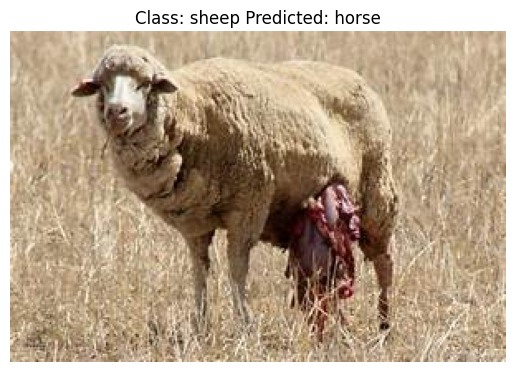

In [33]:
# Ready to look at some images
index = 12
incorrect = skimage.io.imread(incorrect_preds['Filenames'].iloc[index])
plt.imshow(incorrect)
plt.axis("off")
plt.title("Class: {} Predicted: {}".format(incorrect_preds['Class'].iloc[index], incorrect_preds['Predicted_Class'].iloc[index]))
plt.show()

In [34]:
import torchvision
from torch import nn

# Use a pretrained model from PyTorch
resnet18 = torchvision.models.resnet18(pretrained=True, progress=True)

# Find the name of the output layer, then in the next cell
# We will replace the number of classes from 1000 to 10
print(resnet18)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 112MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [35]:
num_classes = 10
resnet18.fc = nn.Linear(512, num_classes)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('using gpu!')
else:
  device = torch.device('cpu')
  print('using cpu!')

using gpu!


In [37]:
import torch.optim as optim
from sklearn.model_selection import train_test_split

class AnimalsTenDataset(Dataset):
    def __init__(self, dataset_df, transform=None, target_transform=None):
        self.img_labels = dataset_df['category_num']
        self.img_labels_eng = dataset_df['category']
        self.img_paths = dataset_df['filename']
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths.iloc[idx]
        # Index out alpha channel
        image = skimage.io.imread(img_path)
        if(len(image.shape) < 3):
            image = skimage.color.gray2rgb(image)
        image = image[:, :, :3]
        label = self.img_labels.iloc[idx]
        label_eng = self.img_labels_eng.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        output = {"image": image, "label": label, "label_eng": label_eng, "img_path": img_path}
        return output

resnet18 = torchvision.models.resnet18(pretrained=True)
num_classes = 10
resnet18.fc = nn.Linear(512, num_classes)

X = under_samped_df
y=under_samped_df['category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y)

# Check equal distribution between train and validation
print(X_train['category'].value_counts())
print(X_val['category'].value_counts())

# Define losses and optimizer
resnet18.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.0005, weight_decay=0.001)

classes = {}

X_train.reset_index(inplace=True)
for i in range(len(X_train)):
    c_cat = int(X_train.loc[i, 'category_num'])
    if c_cat not in classes:
        classes[c_cat] = X_train.loc[i, 'category']



elephant     90
dog          90
squirrel     90
butterfly    90
sheep        90
cat          90
chicken      90
horse        90
spider       90
cow          90
Name: category, dtype: int64
chicken      10
cat          10
cow          10
squirrel     10
dog          10
spider       10
sheep        10
elephant     10
butterfly    10
horse        10
Name: category, dtype: int64


In [38]:
import albumentations as A
import cv2
from albumentations.pytorch import ToTensorV2

# From Eariler
# We need to use CV2 for Albumentations (well not need, but it make it easier)
class AnimalsTenDataset_Album(Dataset):
    def __init__(self, dataset_df, transform=None, target_transform=None):
        self.img_labels = dataset_df['category_num']
        self.img_labels_eng = dataset_df['category']
        self.img_paths = dataset_df['filename']
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths.iloc[idx]
        # Index out alpha channel
        image = cv2.imread(img_path)[:, :, :3]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.img_labels.iloc[idx]
        label_eng = self.img_labels_eng.iloc[idx]
        if self.transform:
            transformed = self.transform(image=image)
            image = transformed['image']
        if self.target_transform:
            label = self.target_transform(label)

        output = {"image": image, "label": label, "label_eng": label_eng, "img_path": img_path}
        return output


# Compose, then test to make sure it works
animal_transforms = A.Compose([
    A.Resize(width=224, height=224),
    A.ColorJitter(brightness=1, contrast=1, saturation=1, hue=1, always_apply=False, p=0.2),
    A.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ToTensorV2(),
])


val_transforms = A.Compose([
    A.Resize(width=224, height=224),
    A.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ToTensorV2(),
])


trainloader = DataLoader(AnimalsTenDataset_Album(X_train, transform=animal_transforms),
                              batch_size=40, shuffle=True)

valloader = DataLoader(AnimalsTenDataset_Album(X_val, transform=val_transforms),
                              batch_size=16, shuffle=False, drop_last=False)


resnet18 = torchvision.models.resnet18(pretrained=True)
num_classes = 10
resnet18.fc = nn.Linear(512, num_classes)

# Define losses and optimizer
resnet18.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.0005, weight_decay=0.0005)

num_epochs = 10
best_val_acc = 0
# Training Loop
# Don't forget to check nvidia-smi for memory usage
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, batch in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs = batch['image'].type(torch.FloatTensor).cuda()
        labels = batch['label'].type(torch.LongTensor).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print statistics
        running_loss += loss.item()
        if i % 10 == 0 and i != 0:
            print(f'[{epoch}, {i}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

    correct = 0
    total = 0
    correct_pred = {}
    total_pred = {}
    for k,v in classes.items():
        correct_pred[v] = k
        total_pred[v] = k

    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for batch in valloader:

            inputs = batch['image'].type(torch.FloatTensor).cuda()
            labels = batch['label'].type(torch.LongTensor).cuda()
            # calculate outputs by running images through the network
            start = torch.cuda.Event(enable_timing=True)
            end = torch.cuda.Event(enable_timing=True)

            start.record()
            outputs = resnet18(inputs)
            end.record()

            # Waits for everything to finish running
            torch.cuda.synchronize()

            print("Time Taken Per 16 images: {} ms".format(start.elapsed_time(end)))
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    correct_pred[classes[int(label.data.cpu())]] += 1
                total_pred[classes[int(label.data.cpu())]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    c_val_acc = 100 * correct // total
    print(f'Accuracy of the network on the 100 test images: {c_val_acc} % \n')

    if (c_val_acc) > best_val_acc:
        torch.save(resnet18.state_dict(), "./animals_10_model")
        best_val_acc = c_val_acc

print('Finished Training')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[0, 10] loss: 1.157
[0, 20] loss: 0.693
Time Taken Per 16 images: 31.539424896240234 ms
Time Taken Per 16 images: 13.515711784362793 ms
Time Taken Per 16 images: 13.537280082702637 ms
Time Taken Per 16 images: 13.535039901733398 ms
Time Taken Per 16 images: 13.511808395385742 ms
Time Taken Per 16 images: 13.508607864379883 ms
Time Taken Per 16 images: 34.231040954589844 ms
Accuracy for class: elephant is 94.1 %
Accuracy for class: dog   is 87.5 %
Accuracy for class: squirrel is 80.0 %
Accuracy for class: butterfly is 94.4 %
Accuracy for class: sheep is 40.0 %
Accuracy for class: cat   is 63.6 %
Accuracy for class: chicken is 100.0 %
Accuracy for class: horse is 94.7 %
Accuracy for class: spider is 92.3 %
Accuracy for class: cow   is 64.3 %
Accuracy of the network on the 100 test images: 76 % 

[1, 10] loss: 0.403
[1, 20] loss: 0.390
Time Taken Per 16 images: 13.554143905639648 ms
Time Taken Per 16 images: 13.515647888183594 ms
Time Taken Per 16 images: 13.549568176269531 ms
Time Taken 

[0, 10] loss: 13.966
[0, 20] loss: 4.626
Time Taken Per 16 images: 13.636992454528809 ms
Time Taken Per 16 images: 13.641983985900879 ms
Time Taken Per 16 images: 13.584447860717773 ms
Time Taken Per 16 images: 13.623295783996582 ms
Time Taken Per 16 images: 13.62492847442627 ms
Time Taken Per 16 images: 13.67244815826416 ms
Time Taken Per 16 images: 4.502655982971191 ms
Accuracy for class: elephant is 41.2 %
Accuracy for class: dog   is 37.5 %
Accuracy for class: squirrel is 33.3 %
Accuracy for class: butterfly is 50.0 %
Accuracy for class: sheep is 0.0 %
Accuracy for class: cat   is 18.2 %
Accuracy for class: chicken is 91.7 %
Accuracy for class: horse is 47.4 %
Accuracy for class: spider is 23.1 %
Accuracy for class: cow   is 28.6 %
Accuracy of the network on the 100 test images: 11 % 

[1, 10] loss: 3.965
[1, 20] loss: 3.221
Time Taken Per 16 images: 13.651200294494629 ms
Time Taken Per 16 images: 13.617152214050293 ms
Time Taken Per 16 images: 13.579936027526855 ms
Time Taken Per 

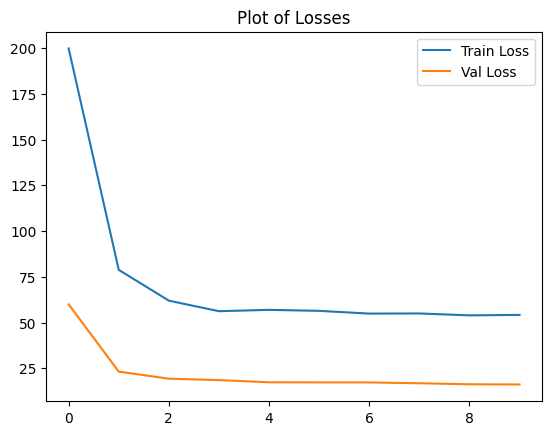

In [39]:
# Now we need to make a dataset and a training loop

import albumentations as A
import cv2
from albumentations.pytorch import ToTensorV2

# From Eariler
# We need to use CV2 for Albumentations (well not need, but it make it easier)
class AnimalsTenDataset_Album(Dataset):
    def __init__(self, dataset_df, transform=None, target_transform=None):
        self.img_labels = dataset_df['category_num']
        self.img_labels_eng = dataset_df['category']
        self.img_paths = dataset_df['filename']
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths.iloc[idx]
        # Index out alpha channel

        image = cv2.imread(img_path)[:, :, :3]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        label = self.img_labels.iloc[idx]
        label_eng = self.img_labels_eng.iloc[idx]
        if self.transform:
            if image.shape[-1] == 4:
                print(img_path)
            transformed = self.transform(image=image)
            image = transformed['image']
        if self.target_transform:
            label = self.target_transform(label)

        output = {"image": image, "label": label, "label_eng": label_eng, "img_path": img_path}
        return output


# Compose, then test to make sure it works
animal_transforms = A.Compose([
    A.Resize(width=224, height=224),
    A.ColorJitter(brightness=1, contrast=1, saturation=1, hue=1, always_apply=False, p=0.2),
    A.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ToTensorV2(),
])


val_transforms = A.Compose([
    A.Resize(width=224, height=224),
    A.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ToTensorV2(),
])


trainloader = DataLoader(AnimalsTenDataset_Album(X_train, transform=animal_transforms),
                              batch_size=40, shuffle=True)

valloader = DataLoader(AnimalsTenDataset_Album(X_val, transform=val_transforms),
                              batch_size=16, shuffle=False, drop_last=False)


resnet18 = torchvision.models.resnet18(pretrained=True)
num_classes = 10
resnet18.fc = nn.Linear(512, num_classes)

# Define losses and optimizer
resnet18.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.1, weight_decay=0.0005)

num_epochs = 10
best_val_acc = 0
loss_plot = []
val_loss = []
# Training Loop
# Don't forget to check nvidia-smi for memory usage
for epoch in range(num_epochs):

    running_loss = 0.0
    total_loss = 0
    for i, batch in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs = batch['image'].type(torch.FloatTensor).cuda()
        labels = batch['label'].type(torch.LongTensor).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print statistics
        running_loss += loss.item()
        total_loss += loss.item()
        if i % 10 == 0 and i != 0:
            print(f'[{epoch}, {i}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

    loss_plot.append(total_loss)

    correct = 0
    total = 0
    total_val_loss = 0
    correct_pred = {}
    total_pred = {}
    for k,v in classes.items():
        correct_pred[v] = k
        total_pred[v] = k

    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for batch in valloader:

            inputs = batch['image'].type(torch.FloatTensor).cuda()
            labels = batch['label'].type(torch.LongTensor).cuda()
            # calculate outputs by running images through the network
            start = torch.cuda.Event(enable_timing=True)
            end = torch.cuda.Event(enable_timing=True)

            start.record()
            outputs = resnet18(inputs)
            end.record()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            # Waits for everything to finish running
            torch.cuda.synchronize()

            print("Time Taken Per 16 images: {} ms".format(start.elapsed_time(end)))
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    correct_pred[classes[int(label.data.cpu())]] += 1
                total_pred[classes[int(label.data.cpu())]] += 1

        val_loss.append(total_val_loss)
    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    c_val_acc = 100 * correct // total
    print(f'Accuracy of the network on the 100 test images: {c_val_acc} % \n')

    if (c_val_acc) > best_val_acc:
        torch.save(resnet18.state_dict(), "./animals_10_model")
        best_val_acc = c_val_acc

print('Finished Training')

plt.plot(loss_plot)
plt.plot(val_loss)
plt.title("Plot of Losses")
plt.legend(["Train Loss", "Val Loss"])
plt.show()

[0, 10] loss: 1.527
[0, 20] loss: 0.567
Time Taken Per 16 images: 13.68502426147461 ms
Time Taken Per 16 images: 13.58409595489502 ms
Time Taken Per 16 images: 13.58505630493164 ms
Time Taken Per 16 images: 13.614496231079102 ms
Time Taken Per 16 images: 13.620736122131348 ms
Time Taken Per 16 images: 13.557760238647461 ms
Time Taken Per 16 images: 4.738304138183594 ms
Accuracy for class: elephant is 100.0 %
Accuracy for class: dog   is 87.5 %
Accuracy for class: squirrel is 73.3 %
Accuracy for class: butterfly is 88.9 %
Accuracy for class: sheep is 70.0 %
Accuracy for class: cat   is 72.7 %
Accuracy for class: chicken is 91.7 %
Accuracy for class: horse is 89.5 %
Accuracy for class: spider is 100.0 %
Accuracy for class: cow   is 85.7 %
Accuracy of the network on the 100 test images: 81 % 

[1, 10] loss: 0.245
[1, 20] loss: 0.234
Time Taken Per 16 images: 13.764927864074707 ms
Time Taken Per 16 images: 13.617152214050293 ms
Time Taken Per 16 images: 13.57414436340332 ms
Time Taken Per 

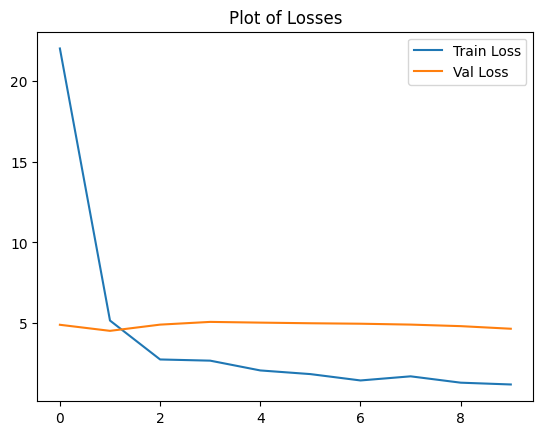

In [40]:
# Now let's use an LR schelduler

trainloader = DataLoader(AnimalsTenDataset_Album(X_train, transform=animal_transforms),
                              batch_size=40, shuffle=True)

valloader = DataLoader(AnimalsTenDataset_Album(X_val, transform=val_transforms),
                              batch_size=16, shuffle=False, drop_last=False)


resnet18 = torchvision.models.resnet18(pretrained=True)
num_classes = 10
resnet18.fc = nn.Linear(512, num_classes)

# Define losses and optimizer
resnet18.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.00025, weight_decay=0.0005)
lr_decay = torch.optim.lr_scheduler.StepLR(optimizer, 5, gamma=0.1, last_epoch=-1, verbose=False)

num_epochs = 10
best_val_acc = 0
loss_plot = []
val_loss = []
# Training Loop
# Don't forget to check nvidia-smi for memory usage
for epoch in range(num_epochs):

    running_loss = 0.0
    total_loss = 0
    for i, batch in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs = batch['image'].type(torch.FloatTensor).cuda()
        labels = batch['label'].type(torch.LongTensor).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print statistics
        running_loss += loss.item()
        total_loss += loss.item()
        if i % 10 == 0 and i != 0:
            print(f'[{epoch}, {i}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

    loss_plot.append(total_loss)

    correct = 0
    total = 0
    total_val_loss = 0
    correct_pred = {}
    total_pred = {}
    for k,v in classes.items():
        correct_pred[v] = k
        total_pred[v] = k

    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for batch in valloader:

            inputs = batch['image'].type(torch.FloatTensor).cuda()
            labels = batch['label'].type(torch.LongTensor).cuda()
            # calculate outputs by running images through the network
            start = torch.cuda.Event(enable_timing=True)
            end = torch.cuda.Event(enable_timing=True)

            start.record()
            outputs = resnet18(inputs)
            end.record()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            # Waits for everything to finish running
            torch.cuda.synchronize()

            print("Time Taken Per 16 images: {} ms".format(start.elapsed_time(end)))
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    correct_pred[classes[int(label.data.cpu())]] += 1
                total_pred[classes[int(label.data.cpu())]] += 1

        val_loss.append(total_val_loss)
    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    c_val_acc = 100 * correct // total
    print(f'Accuracy of the network on the 100 test images: {c_val_acc} % \n')

    if (c_val_acc) > best_val_acc:
        torch.save(resnet18.state_dict(), "./animals_10_model")
        best_val_acc = c_val_acc

    lr_decay.step()

print('Finished Training')

plt.plot(loss_plot)
plt.plot(val_loss)
plt.title("Plot of Losses")
plt.legend(["Train Loss", "Val Loss"])
plt.show()